In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [4]:
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

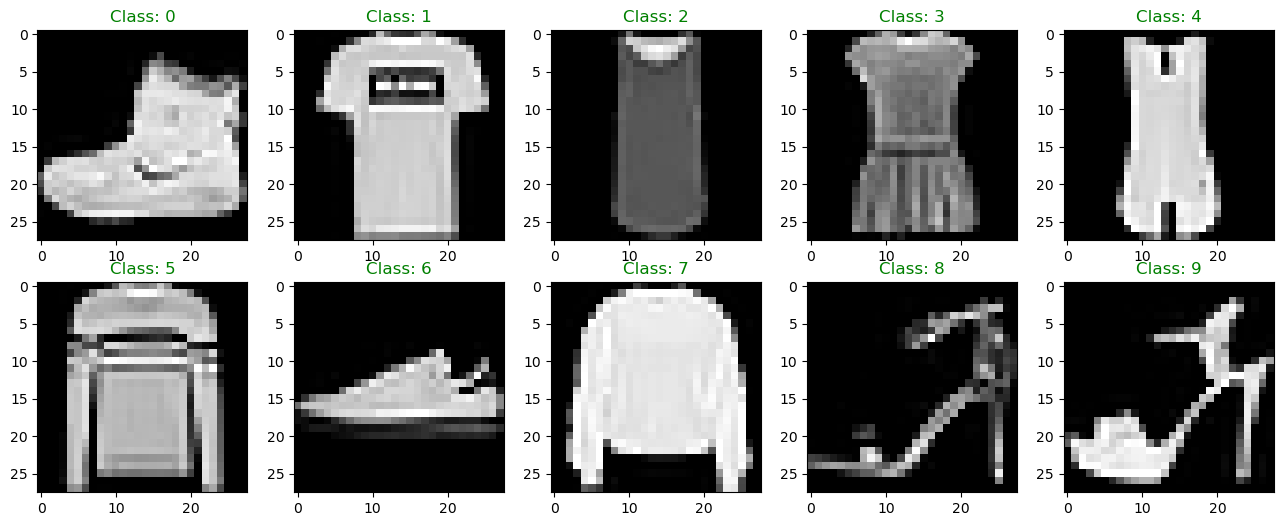

In [5]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    img = x_train[i]
    plt.imshow(img, cmap='gray')
    plt.title("Class: " + str(i), c='g')   
plt.show()

In [6]:
model = Sequential(name='fashion_mnist')
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.4))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001), name='hidden_1'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001), name='hidden_2'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax', name='output'))

In [7]:
model.summary()

Model: "fashion_mnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 7, 7, 64)        

In [8]:
# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0005),
              metrics=['accuracy'])

#Train model
history = model.fit(x_train, y_train,
                    batch_size=256,
                    epochs=54,
                    verbose=1,
                    validation_data=(x_test, y_test))

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', test_acc)

Epoch 1/54
235/235 [==============================] - 4s 17ms/step - loss: 0.8172 - accuracy: 0.7399 - val_loss: 1.2038 - val_accuracy: 0.8270
Epoch 2/54
235/235 [==============================] - 4s 16ms/step - loss: 0.5762 - accuracy: 0.8307 - val_loss: 0.5672 - val_accuracy: 0.8605
Epoch 3/54
235/235 [==============================] - 4s 15ms/step - loss: 0.5066 - accuracy: 0.8568 - val_loss: 0.4683 - val_accuracy: 0.8702
Epoch 4/54
235/235 [==============================] - 4s 17ms/step - loss: 0.4709 - accuracy: 0.8698 - val_loss: 0.4411 - val_accuracy: 0.8820
Epoch 5/54
235/235 [==============================] - 4s 17ms/step - loss: 0.4380 - accuracy: 0.8807 - val_loss: 0.4231 - val_accuracy: 0.8859
Epoch 6/54
235/235 [==============================] - 4s 18ms/step - loss: 0.4135 - accuracy: 0.8885 - val_loss: 0.3900 - val_accuracy: 0.8973
Epoch 7/54
235/235 [==============================] - 4s 17ms/step - loss: 0.3954 - accuracy: 0.8946 - val_loss: 0.3720 - val_accuracy: 0.8989

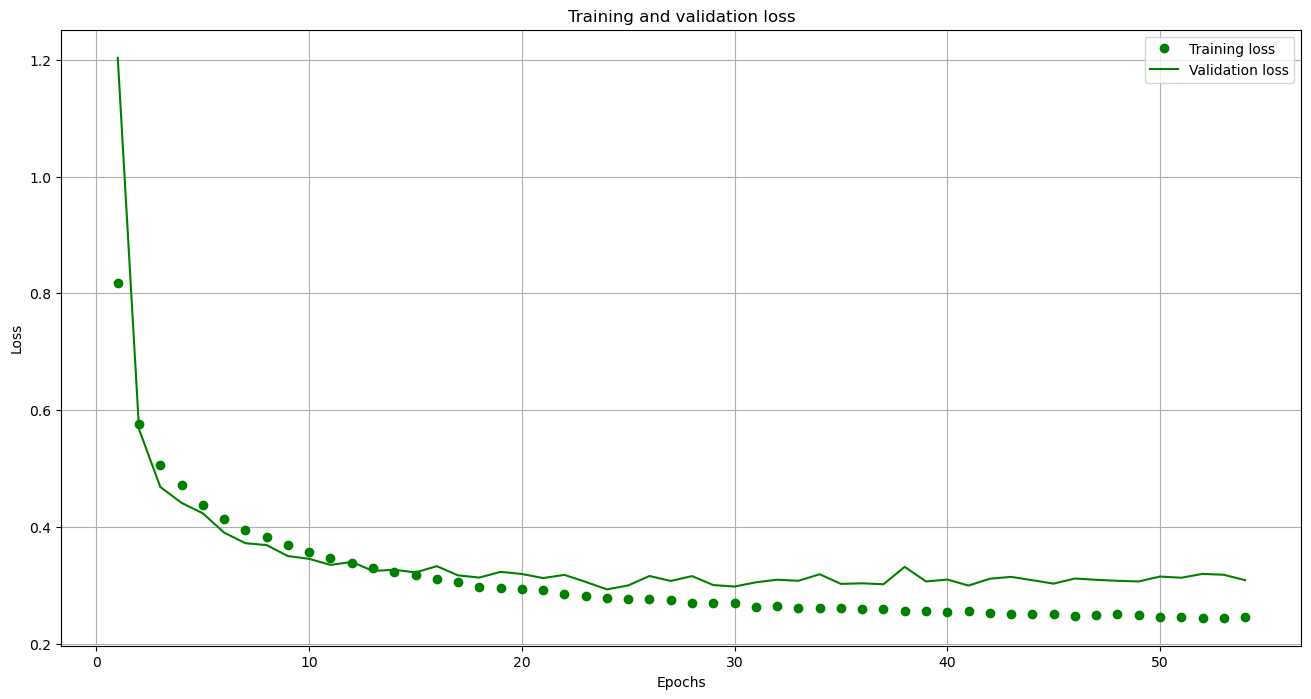

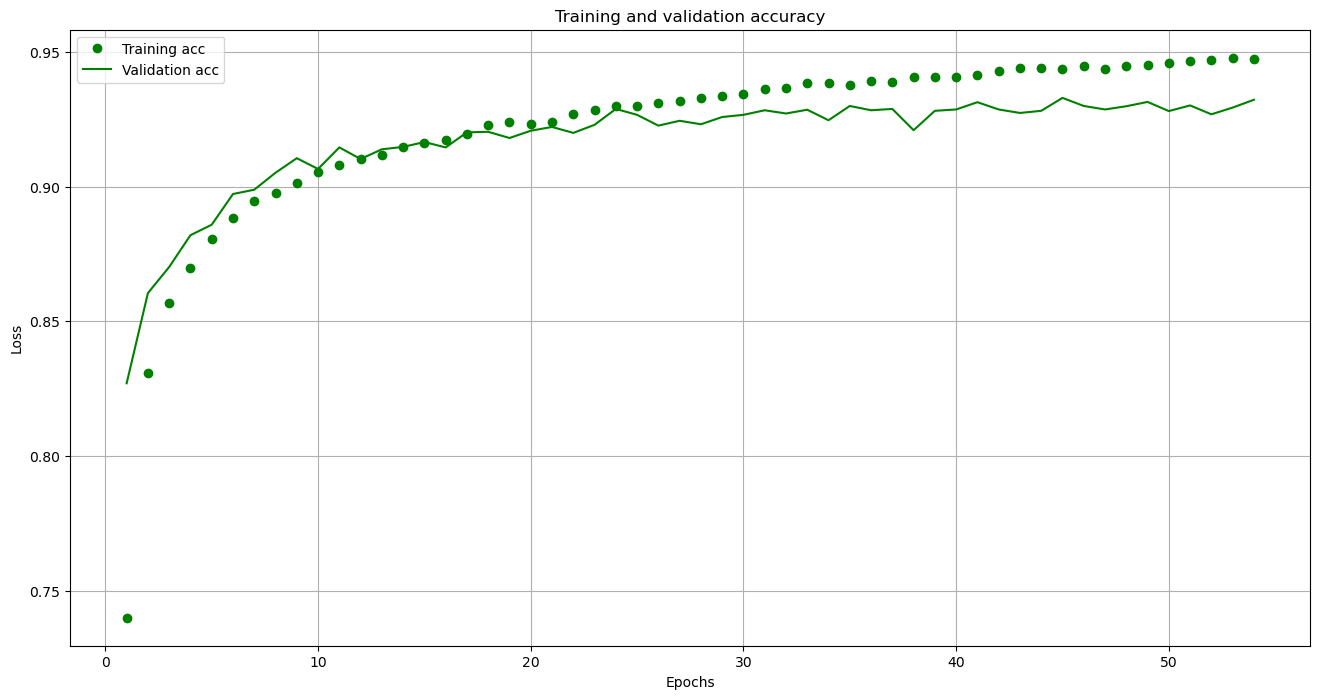

In [9]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.rcParams["figure.figsize"] = (16, 8)
plt.plot(epochs, loss_values, 'go', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

plt.plot(epochs, history_dict['accuracy'], 'go', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

Загалом, згорткові мережі мають здатність до здійснення більш точної класифікації зображень, оскільки вони здатні виявляти локальні залежності в даних, які можуть бути недоступні для багатошарових мереж. Таким чином, краще підходять для задач обробки зображень, розпізнавання об'єктів або класифікація зображень.